In [1]:
# Data Collection
# Data Cleaning/vis...
# Feature En
# ML, 
# DM

In [2]:
# Matrices ( How my machine Learning model is performing(GOod Or Bad))

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv(r"D:\Data Science\MACHINE LEARNING\diabetes (1).csv")
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [5]:
df.isnull().sum() # checking is there any null value or not

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.dtypes  # checking data types

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
df['Outcome']. unique() # checking unique value in 'Outcome' column

array([1, 0], dtype=int64)

In [8]:
df['Pregnancies']. unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14],
      dtype=int64)

In [9]:
df.shape # checking data shape

(768, 9)

In [10]:
df.size # checking data size

6912

In [11]:
# before doing machine learning model we have to split data.

In [12]:
from sklearn.model_selection import train_test_split


x = df.drop('Outcome', axis=1).values # here we droped 'outcome' column to save rest of all column in 'x' variable
y = df['Outcome'].values              # here we considered only 'outcome' coulmn 
                                    # we used '.values' to save output in array format because array is faster than list.

In [13]:
x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [14]:
x1 = df.drop('Outcome', axis=1)
y1 = df['Outcome']                   # here we removed values from the above function
                          

In [15]:
x1

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  
2                       0.672   32  
3                       0.167   21  
4                       2.288   33  
..                        ...  ...  
763                     0.171   63  
764                     0.340   27  
765                     0.245   30  
766                     0.349   47  
767                     0.315   23  

[768 rows x 8 columns]

In [16]:
type(df['Outcome'] )  # 'series' is one of the 'list'

pandas.core.series.Series

In [17]:
type(df['Outcome'].values ) # it is in the form of array

numpy.ndarray

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .20, random_state = 1)

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [20]:
knn.score(x_test, y_test)

0.7337662337662337

In [24]:
neighbor = np.arange(1,12)
train_acc = np.empty (len(neighbor))  # here we are saving data into empty list into an array
test_acc = np.empty (len(neighbor))  # here we created this argument to create multiple neighbor (1-12)

for i, j in enumerate(neighbor):
    knn = KNeighborsClassifier(n_neighbors=j) # 'n_neighbors' is an parameter (it is for data restriction)
    knn.fit(x_train, y_train)          # here we fit data into 'KNeighbors' model
    
    train_acc[i] = knn.score(x_train, y_train) # it's for data train
    
    test_acc[i] = knn.score(x_test, y_test)   # it's for data test 


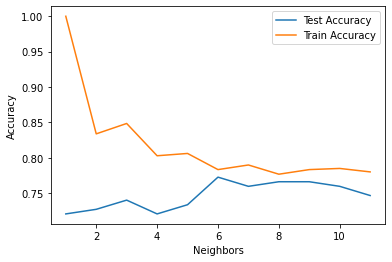

In [25]:
from sklearn import neighbors
import matplotlib.pyplot as plt

plt.plot(neighbor, test_acc, label = "Test Accuracy")
plt.plot(neighbor, train_acc, label = "Train Accuracy")
plt.legend()
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [26]:
# Confustion matrix

from sklearn.metrics import confusion_matrix

In [30]:
y_pred=knn.predict(x_test)

In [31]:
confusion_matrix(y_test,y_pred)

array([[82, 17],
       [22, 33]], dtype=int64)

learnt from youtube

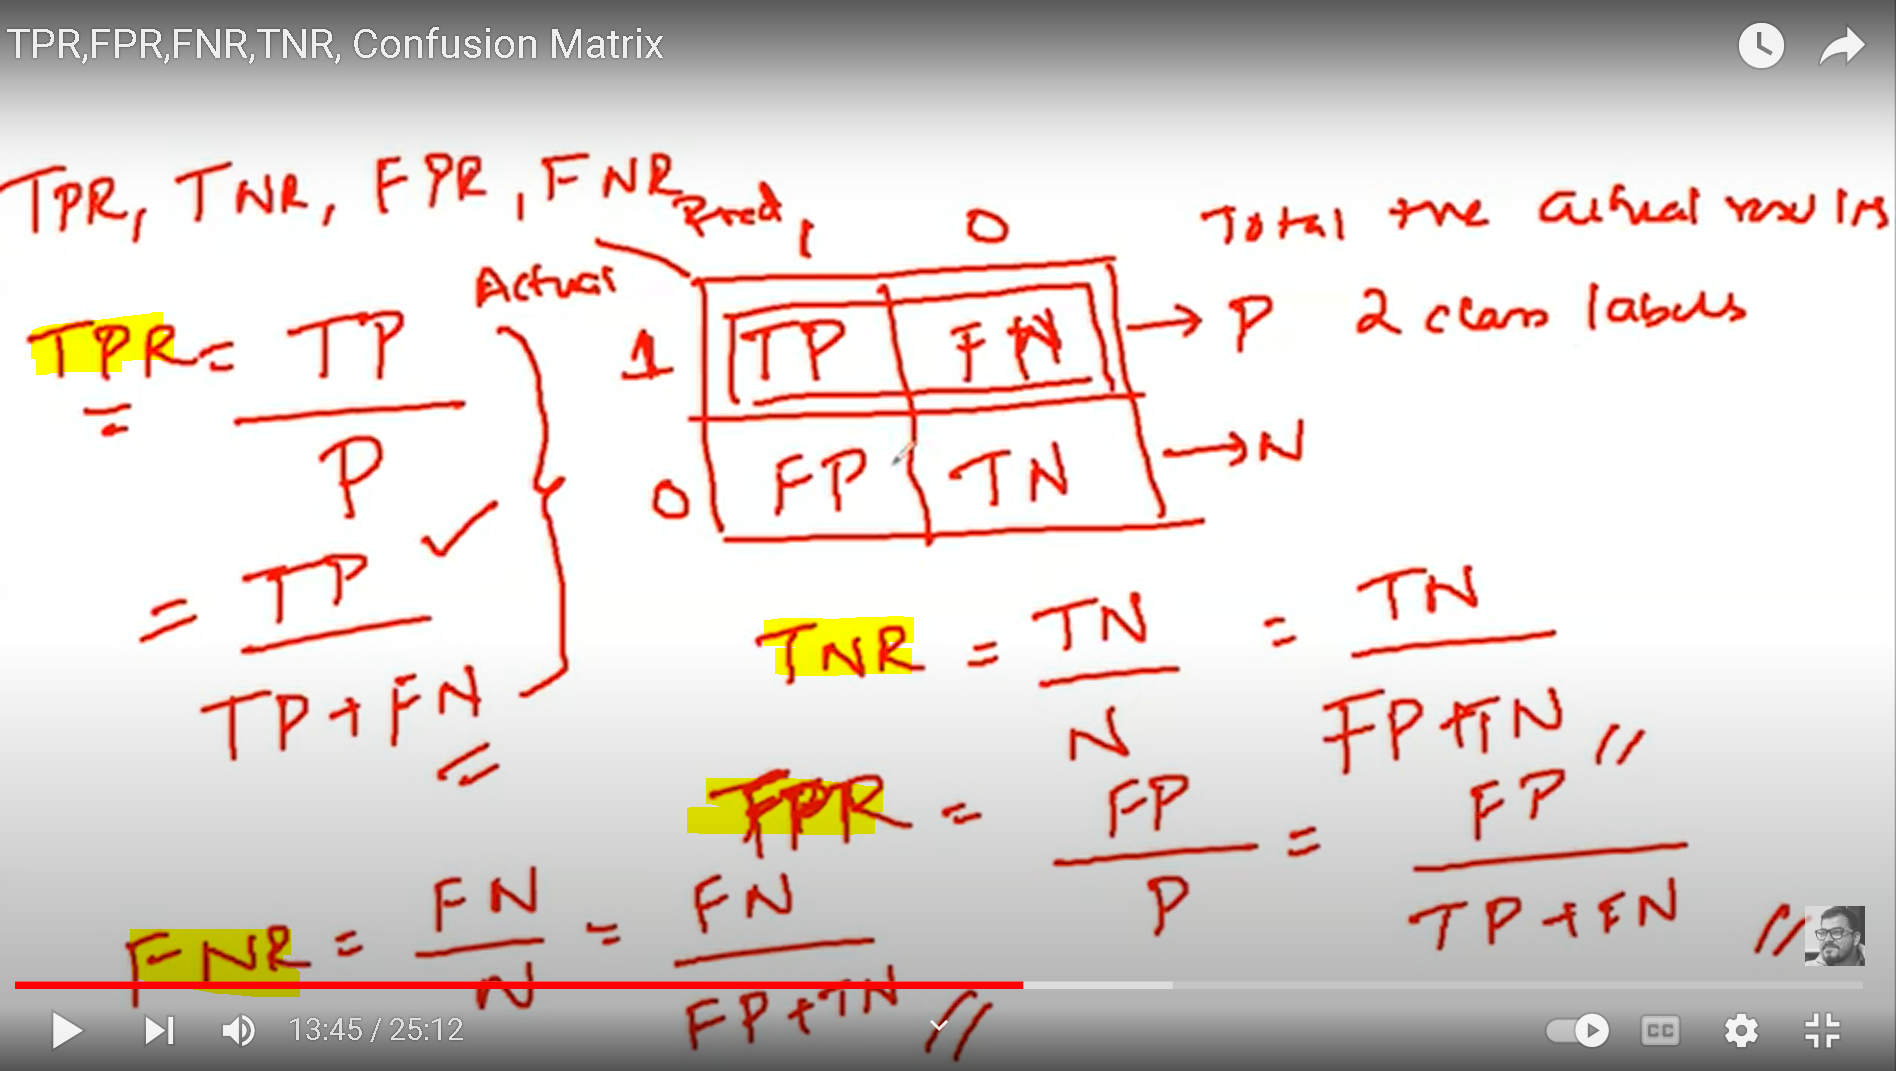

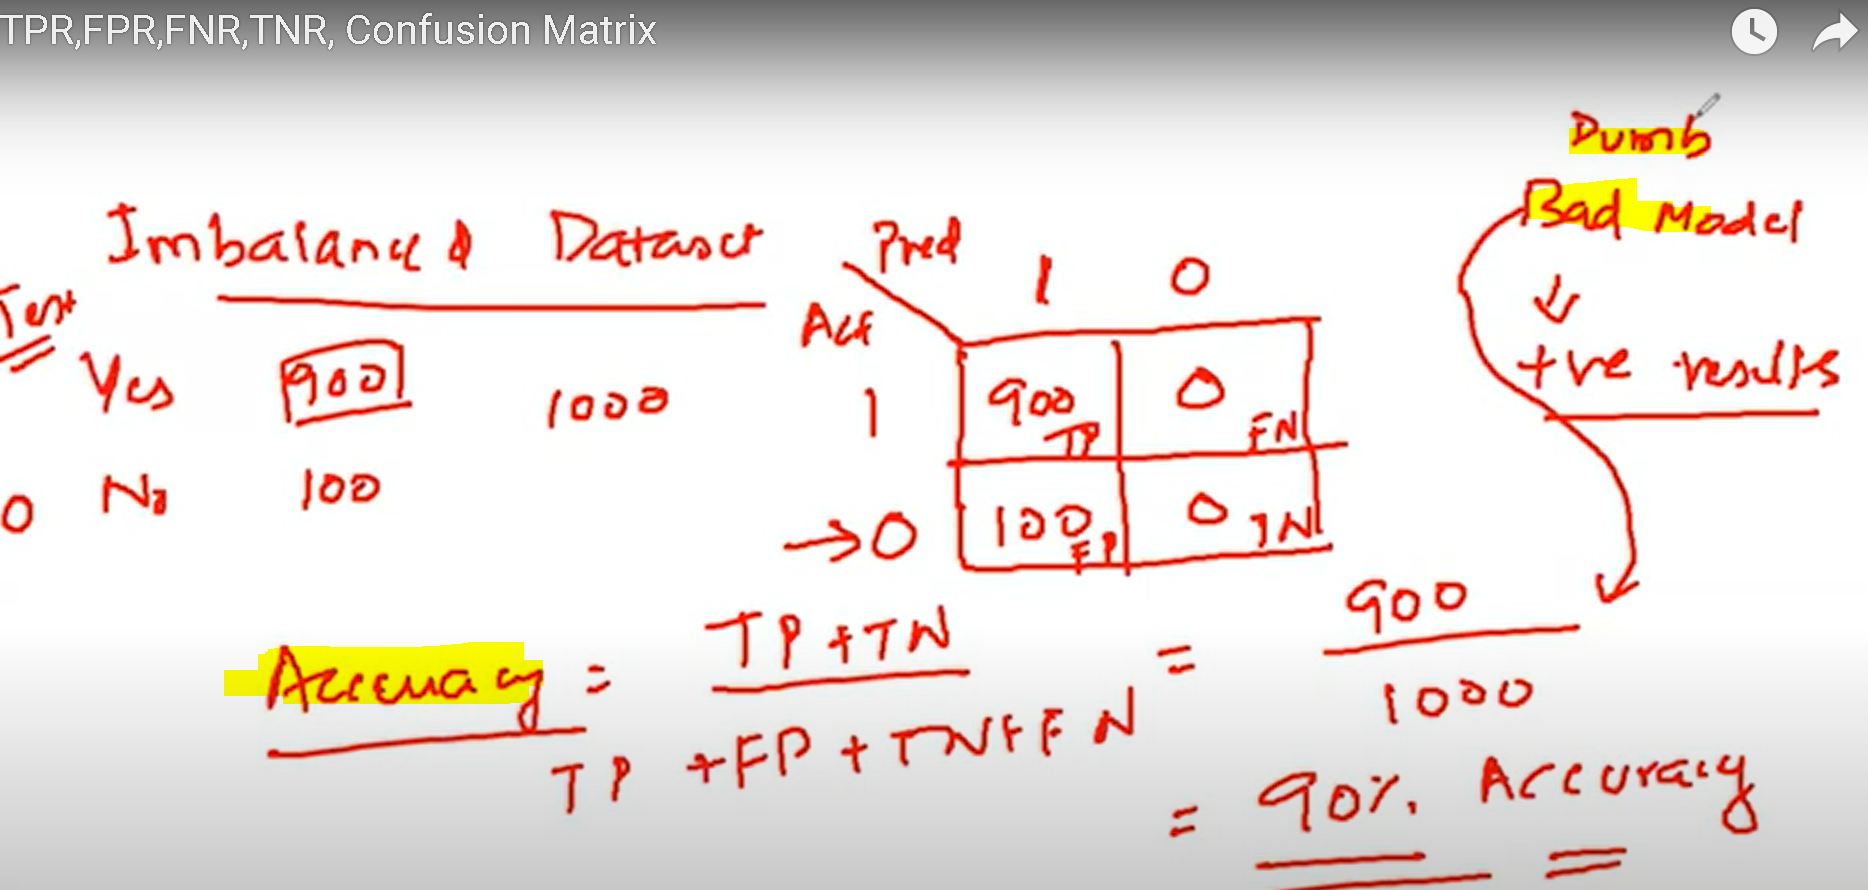

`When we created a bad model then accuracy should not be considered, sometimes accuracy will show above 90% also. at that time
we should check TPR and TNR , FPR and FNR`

`Always we should check TPR and TNR, if the both is having good accuracy, FPR and FNR is very low, then we can consider it as good model` 
* TPR and TNR should be very high and FPR and FNR be very less then we can consider as good model

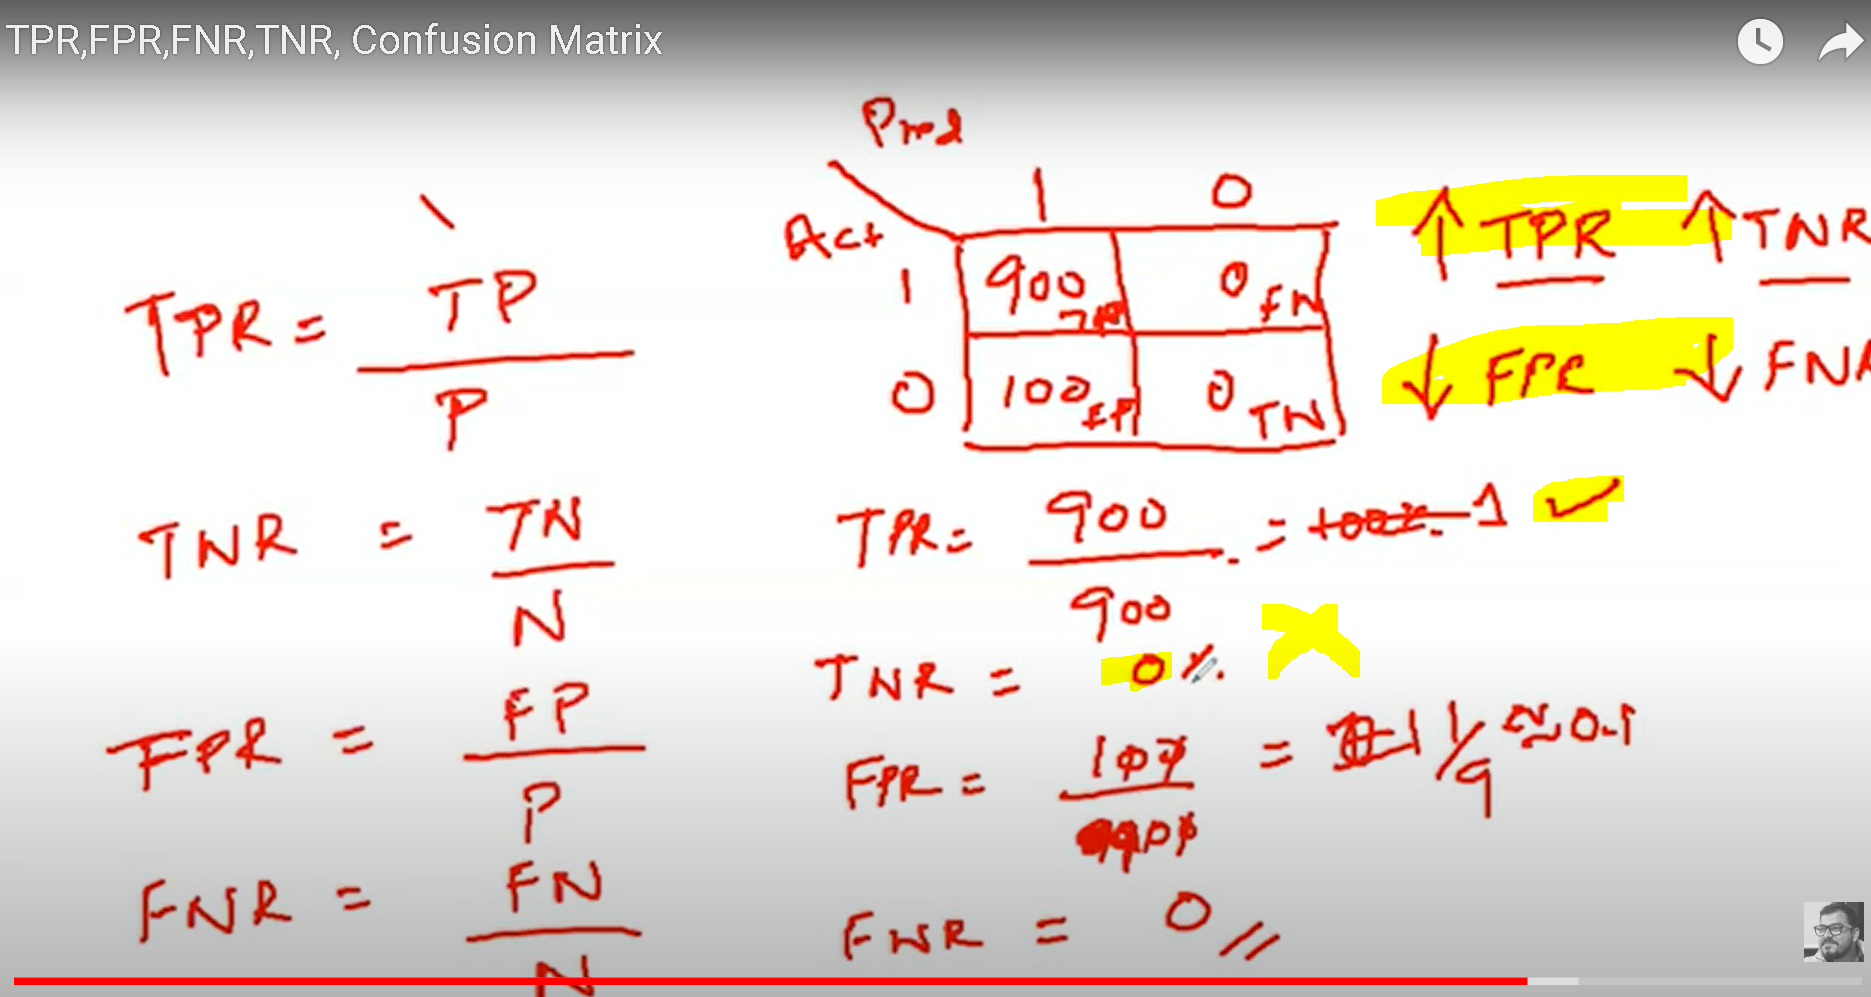

`TPR and TNR , FPR and FNR considered based on variuos domain`

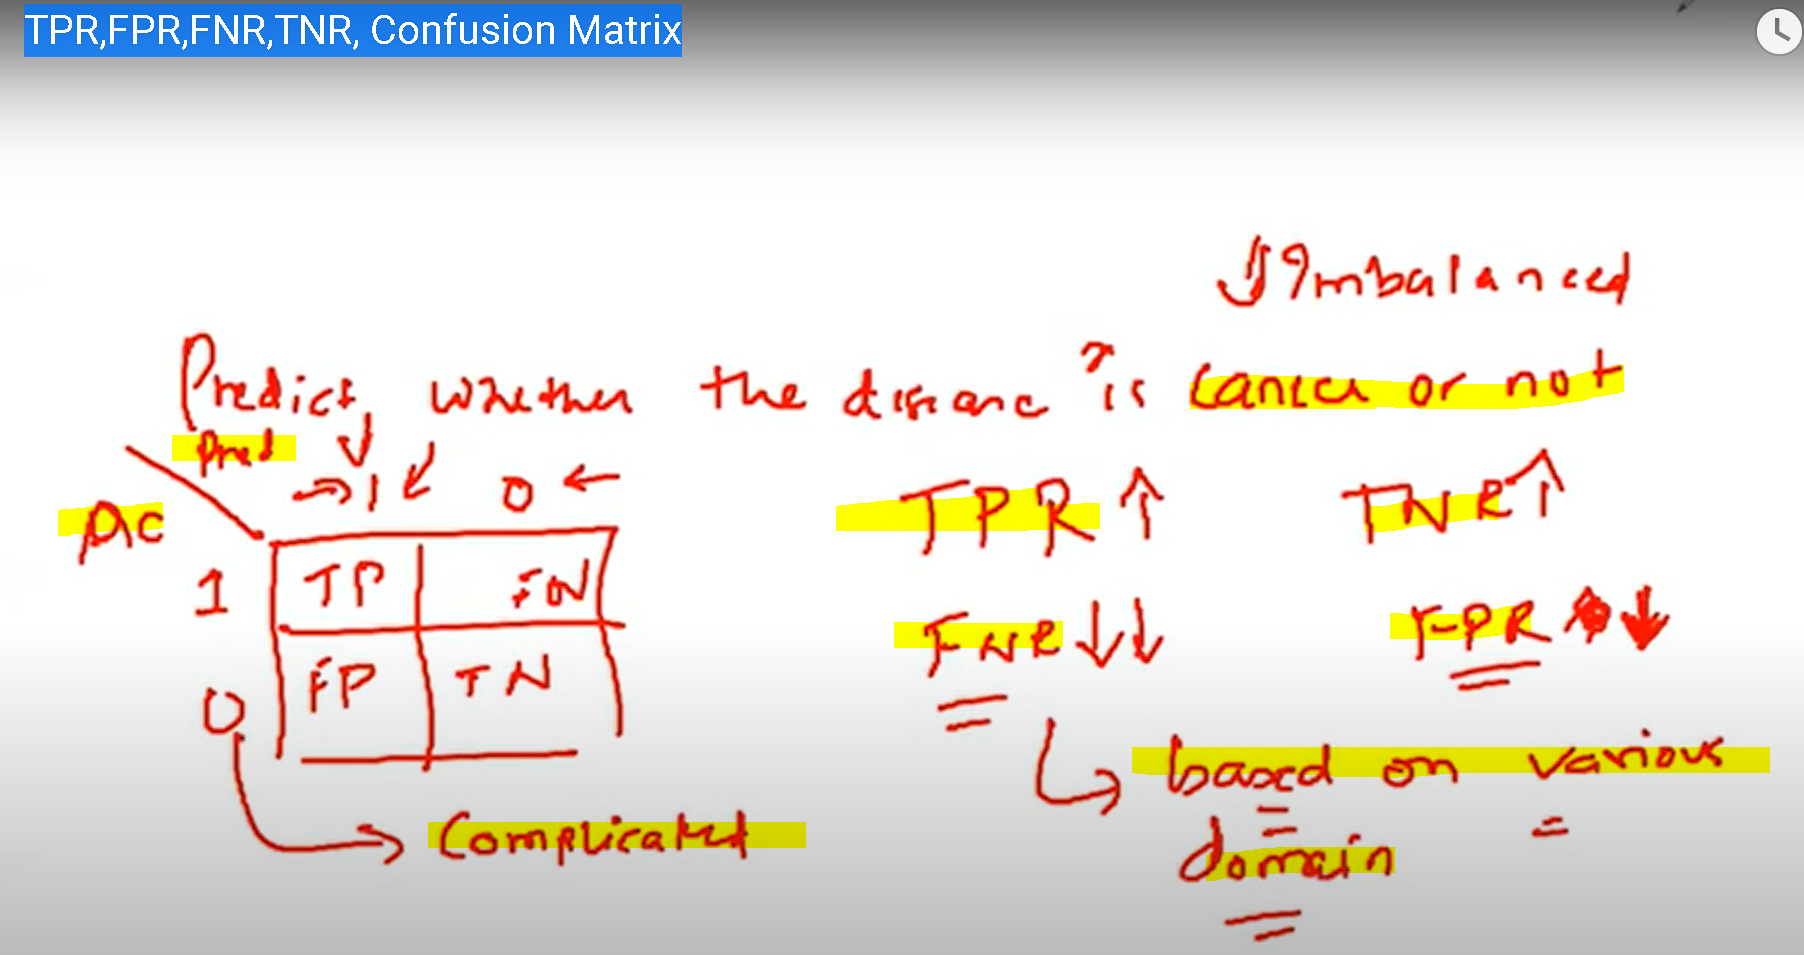

https://www.youtube.com/watch?v=-dsoGHvk7II

# Normalization and Standardization

In [ ]:
Normalization:
    it will scale a data range between 0 to 1 
    ex: MinMaxScaler()

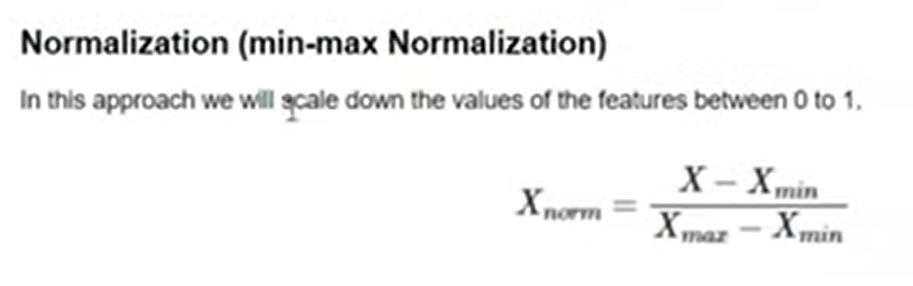

`mimmaxscaler is better in image processing`

In [ ]:
Standardization:
    it will scale data with the help of standard diviation
    ex: StandardScaler()

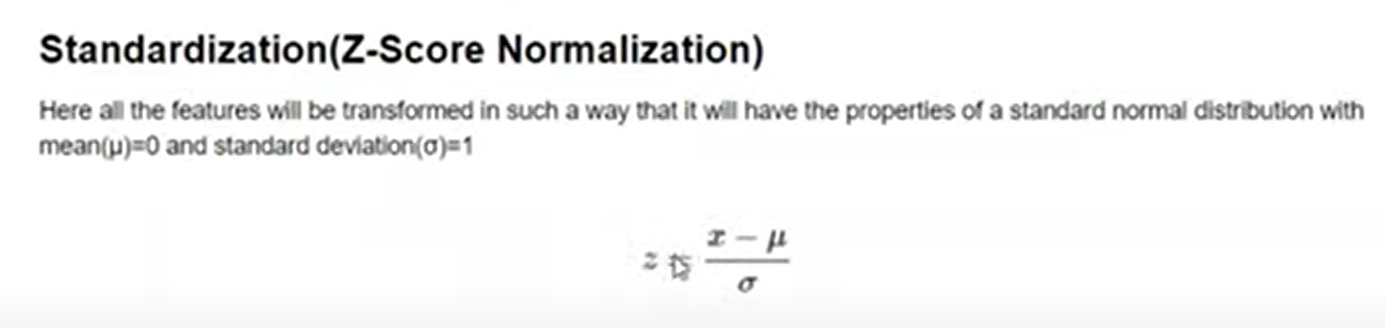

`most of the developer use standardscaler`